# IÐN303G Tæknileg kerfi - Sýnidæmi - Stýringar - PI

## Inngangur
Markmiðið með þessu sýnidæmi er að kynnast hönnun PI stýringa.

Gefið er sjálfvirkt stýrikerfi sem má lýsa með eftirfarandi blokkriti.

<div>
<img src="https://github.com/rsaemundsson/idn_303_TS_23/blob/main/automatic_control_system_pi.png?raw=true", width=600>

Til stendur að hanna PI stýringu sem tryggir að engin skekkja sé í jafnvægi, fasaöryggi sé a.m.k. 60 gráður og stýrimerki sé ekki stærra en 0.5 þegar óskgildi breytist um 0.5.

In [ ]:
!pip install control


      4.2
---------------
5 s^2 + 6 s + 1

Lágmarks fasaöryggi m.t.t. PI stýringar 70.8
Mögnunaröryggi:  inf
Fasaöryggi:  72.86595219427033
w_pi:  nan
w_c:  0.6689326795693462


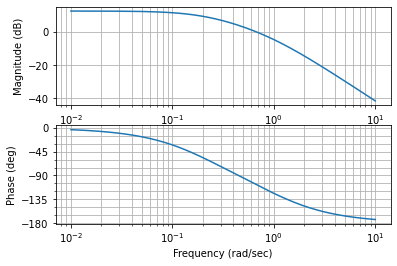

In [1]:
# Hlaða inn þeim forritasöfnum sem þarf að hlaða inn
import numpy as np
import control as ct
import matplotlib.pyplot as plt

# Fasaöryggi í gráðum

phase_margin_criteria = 60
phase_margin_PI = 60 + 0.06 * 180

# Yfirfærslufall

G_P=ct.tf(3,[5, 6, 1])


# Stöðugleikagreining
# Vel K sem gefur lágmarks fasaöryggi
K = 1.4

G_K = ct.series(K, G_P)
print(G_K)

mag,phase,omega=ct.bode(G_K, dB=True)

gm, pm, wcg, wcp_init = ct.margin(G_K)
print("Lágmarks fasaöryggi m.t.t. PI stýringar", phase_margin_PI)
print("Mögnunaröryggi: ",gm)
print("Fasaöryggi: ",pm)
print("w_pi: ",wcg)
print("w_c: ",wcp_init)


10.46 s + 1.4
-------------
   7.475 s


         31.39 s + 4.2
-------------------------------
37.37 s^3 + 44.85 s^2 + 7.475 s

Mögnunaröryggi:  inf
Fasaöryggi:  61.07343535375492
w_pi:  nan
w_c:  0.6793465649288308


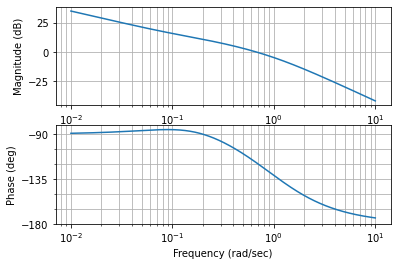

In [2]:
#Vel gildi á T_I
T_I = 1.0 / (0.2 * wcp_init)

G_PI = ct.tf([K * T_I, K],[T_I, 0])

print(G_PI)

# Stöðugleikagreining - Staðfesti að fasaöryggi sé uppfyllt

G_K=ct.series(G_PI, G_P)
print(G_K)

mag,phase,omega=ct.bode(G_K, dB=True)

gm, pm, wcg, wcp_final = ct.margin(G_K)
print("Mögnunaröryggi: ", gm)
print("Fasaöryggi: ",pm)
print("w_pi: ",wcg)
print("w_c: ",wcp_final)

Text(0, 0.5, 'u')

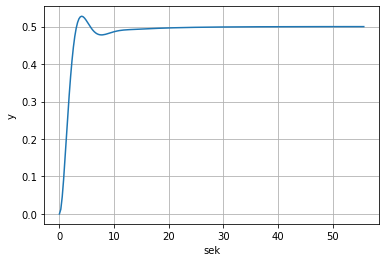

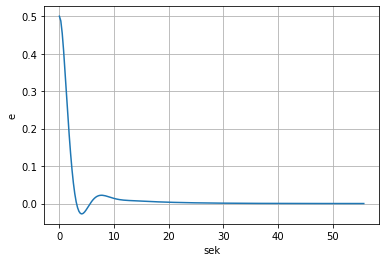

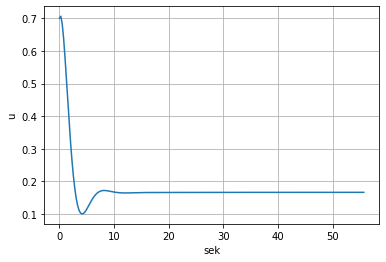

In [3]:
#Greining - þrepabreyting í R upp á 0.5, söfnunartími 1 sek

r_delta = 0.5
t_delta = 1

# Jafnvægi úttaks 

G_T = ct.feedback(ct.series(G_PI, G_P), 1)

t,y = ct.step_response(G_T)
plt.figure(1)
plt.plot(t_delta * t,r_delta * y)
plt.grid()
plt.xlabel('sek')
plt.ylabel('y')

# Skekkja í jafnvægi (eftir þrepabreyingu í R)

G_E = ct.feedback(1,ct.series(G_PI,G_P))

t,e = ct.step_response(G_E)
plt.figure(2)
plt.plot(t_delta * t,r_delta * e)
plt.grid()
plt.xlabel('sek')
plt.ylabel('e')

# Stýrimerki (eftir þrepabreytingu í R)

G_U = ct.feedback(G_PI,G_P)

t,u = ct.step_response(G_U)
plt.figure(3)
plt.plot(t_delta * t,r_delta * u)
plt.grid()
plt.xlabel('sek')
plt.ylabel('u')


Mögnunaröryggi:  inf
Fasaöryggi:  72.11925095799342
w_pi:  nan
w_c:  0.4677800039626065


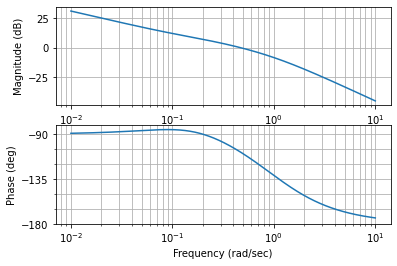

In [4]:
# Sé að stýrimerki er of hátt. Vel K þannig að stýrimerki sé innan marka. Veit að kerfið er stöðugra eftir það.
# Þarf ekki stöðuleikagreiningu. Uppfæri T_I og fer aftur í gegnum greiningu (næsta sella).
K = 0.9
T_I = 1.0 / (0.2 * wcp_init)

G_PI = ct.tf([K * T_I, K],[T_I, 0])

# Stöðugleikagreining - til að sjá hvert fasaöryggið er.
G_K=ct.series(G_PI, G_P)

mag,phase,omega=ct.bode(G_K, dB=True)

gm, pm, wcg, wcp_final = ct.margin(G_K)
print("Mögnunaröryggi: ", gm)
print("Fasaöryggi: ",pm)
print("w_pi: ",wcg)
print("w_c: ",wcp_final)


Text(0, 0.5, 'u')

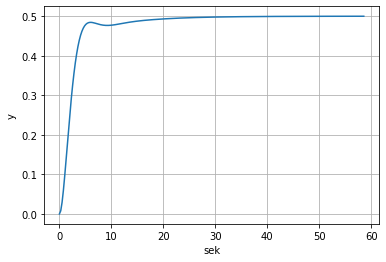

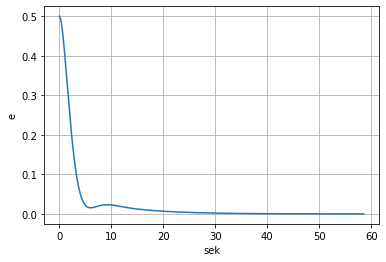

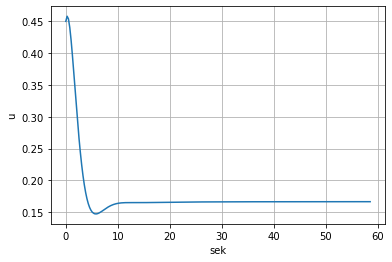

In [5]:
# Jafnvægi úttaks 

G_T = ct.feedback(ct.series(G_PI, G_P), 1)

t,y = ct.step_response(G_T)
plt.figure(1)
plt.plot(t_delta * t,r_delta * y)
plt.grid()
plt.xlabel('sek')
plt.ylabel('y')

# Skekkja í jafnvægi (eftir þrepabreyingu í R)

G_E = ct.feedback(1,ct.series(G_PI,G_P))

t,e = ct.step_response(G_E)
plt.figure(2)
plt.plot(t_delta * t,r_delta * e)
plt.grid()
plt.xlabel('sek')
plt.ylabel('e')

# Stýrimerki (eftir þrepabreytingu í R)

G_U = ct.feedback(G_PI,G_P)

t,u = ct.step_response(G_U)
plt.figure(3)
plt.plot(t_delta * t,r_delta * u)
plt.grid()
plt.xlabel('sek')
plt.ylabel('u')